## Load functions / packages and configure

In [81]:
%run datahub.py

In [128]:
mpl.rcParams["figure.figsize"] = 10,8

## Load resource paths for datasets

In [83]:
domain = "https://datahub.io"
search_page_gdp = "/core/gdp"
search_page_world_cities = "/core/world-cities"

_, gdp_resources = process_datahub(search_page_gdp)
_, world_cities_resources = process_datahub(search_page_world_cities)

Search /core/gdp: Resource received correctly
Get available resource path /core/gdp: Data type - file size saved
Get available resource path /core/gdp: Data type - file size saved
Get available resource path /core/gdp: Data type - file size saved
Search /core/world-cities: Resource received correctly
Get available resource path /core/world-cities: Data type - file size saved
Get available resource path /core/world-cities: Data type - file size saved
Get available resource path /core/world-cities: Data type - file size saved


## Load datasets into pd.DataFrame

In [91]:
gdp = pd.read_csv(f"{domain}{gdp_resources['csv']}")
world = pd.read_csv(f"{domain}{world_cities_resources['csv']}")

## Process data

### GDP

<AxesSubplot:xlabel='Year'>

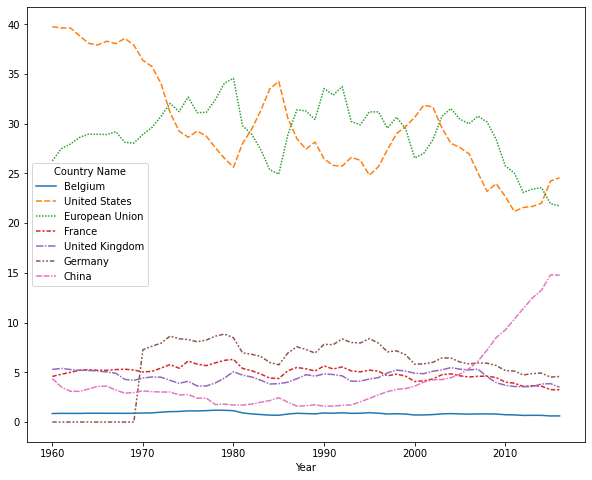

In [129]:
gdp_pivot = gdp.pivot_table(index = "Country Name", columns = "Year", values = "Value", fill_value = 0)
subset = gdp_pivot.loc[["Belgium", "United States", "European Union", "France", "United Kingdom", "Germany", "World", "China"]]
subset_perc_vs_world = subset.drop("World", axis = 0) / subset.loc["World"] * 100
sns.lineplot(data = subset_perc_vs_world.T)

### Cities

In [136]:
world[world.country.apply(lambda x: x.startswith("Bel"))]
world[world.name == "Paris"]

,name,country,subcountry,geonameid
6818,Paris,France,Île-de-France,2988507
